# Hopfield Network (1982)

# https://www.pnas.org/doi/10.1073/pnas.79.8.2554

---

## Description
The **Hopfield Network**, introduced by John Hopfield in 1982, is a form of **recurrent neural network (RNN)** where:
- Neurons are **binary units** (\( s_i \in \{-1, +1\} \)).  
- Connections (weights) are **symmetric** (\( w_{ij} = w_{ji} \), and \( w_{ii} = 0 \)).  
- The network updates iteratively until it converges to a **stable pattern**.

The network dynamics can be described by minimizing an **energy function**:

$$
E = -\frac{1}{2} \sum_{i \neq j} w_{ij} s_i s_j + \sum_i \theta_i s_i
$$

where:
- \( w_{ij} \): symmetric weight between neurons \( i \) and \( j \)  
- \( s_i \): state of neuron \( i \) (\(-1\) or \(+1\))  
- \( \theta_i \): threshold (bias) of neuron \( i \)  

Each update decreases the system’s energy until a **local minimum** is reached.

---

## Relevance
- First widely recognized model showing that **neural computation** could be understood in terms of **statistical physics**.  
- Demonstrated how **associative memory** could be modeled in artificial networks:  
  - The network can store patterns as attractors.  
  - When given a partial or noisy input, it evolves into the closest stored pattern (error correction).  
- Inspired later **energy-based models**, including Boltzmann Machines.

---

## Connection
- **Ising Model**: The Hopfield energy function mirrors the Ising model in physics, where spins interact with neighbors and seek low-energy configurations.  
- **Markov Random Fields (MRFs)**: The Hopfield network is closely related to MRFs, since each neuron’s state depends only on its neighbors, forming a probabilistic graphical model.  
- Serves as a bridge between **neural networks** and **probabilistic physics-inspired models**.

---

## Summary
- **Hopfield Network (1982)** = Recurrent network with symmetric weights.  
- Learns by encoding patterns as energy minima (attractors).  
- Provides **associative memory** and error correction.  
- Strongly connected to **Ising models** and **Markov Random Fields**, highlighting the deep link between **neuroscience, physics, and AI**.


In [ ]:
# ===========================================================
# PyTorch Lab: Hopfield Network (1982)
# -----------------------------------------------------------
# Description: Recurrent neural network with symmetric weights
# Converges to stable attractor states (energy minimization).
# Relevance: Linked neural computation to statistical physics.
# Connection: Strongly connected to Ising models & MRFs.
# ===========================================================

import torch
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Hopfield Network Class
# -----------------------------
class HopfieldNetwork:
    def __init__(self, n_units):
        self.n_units = n_units
        self.W = torch.zeros((n_units, n_units), dtype=torch.float32)  # symmetric weights

    def store_patterns(self, patterns):
        """
        Store patterns using Hebbian learning rule:
        W = sum(p * p^T) - N*I
        """
        for p in patterns:
            p = p.view(-1,1).to(torch.float32)
            self.W += p @ p.T
        self.W.fill_diagonal_(0)  # no self-connections
        self.W /= self.n_units

    def energy(self, state):
        """Compute energy of a state"""
        s = state.view(-1,1).to(torch.float32)
        return -0.5 * (s.T @ self.W @ s).item()

    def recall(self, pattern, steps=50):
        """
        Recall stored pattern from noisy input using asynchronous updates.
        """
        state = pattern.clone().to(torch.float32)
        energies = [self.energy(state)]
        snapshots = [state.clone()]
        for step in range(steps):
            i = torch.randint(0, self.n_units, (1,))
            update = torch.sign(torch.dot(self.W[i].view(-1), state))
            if update == 0:
                update = 1
            state[i] = update
            energies.append(self.energy(state))
            if step % 10 == 0:
                snapshots.append(state.clone())
        return state, energies, snapshots

In [ ]:
# -----------------------------
# Utility: Visualize Pattern
# -----------------------------
def plot_pattern(pattern, title):
    side = int(np.sqrt(len(pattern)))
    plt.imshow(pattern.view(side, side).numpy(), cmap="binary")
    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
# -----------------------------
# Define Patterns (5x5 = 25 units)
# -----------------------------
p1 = torch.tensor([
    [1,1,1,1,1],
    [1,-1,-1,-1,1],
    [1,-1,1,-1,1],
    [1,-1,-1,-1,1],
    [1,1,1,1,1]
], dtype=torch.float32).view(-1)

p2 = torch.tensor([
    [1,1,1,1,1],
    [1,-1,-1,-1,-1],
    [1,1,1,1,1],
    [-1,-1,-1,-1,1],
    [1,1,1,1,1]
], dtype=torch.float32).view(-1)

patterns = [p1, p2]

In [ ]:
# -----------------------------
# Train Hopfield Network
# -----------------------------
net = HopfieldNetwork(n_units=25)
net.store_patterns(patterns)

In [ ]:
# -----------------------------
# Recall from Noisy Input (p1)
# -----------------------------
noisy_p1 = p1.clone()
flip_idx = torch.randperm(len(noisy_p1))[:5]  # flip 5 pixels
noisy_p1[flip_idx] *= -1
recovered, energies, snapshots = net.recall(noisy_p1, steps=50)

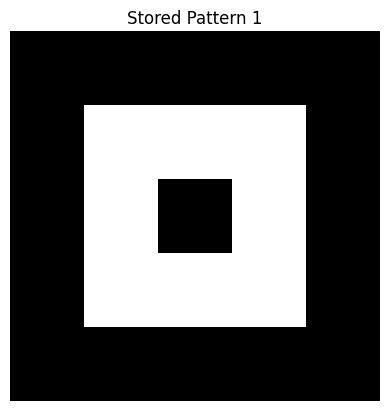

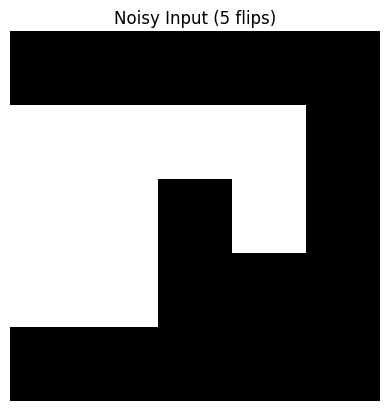

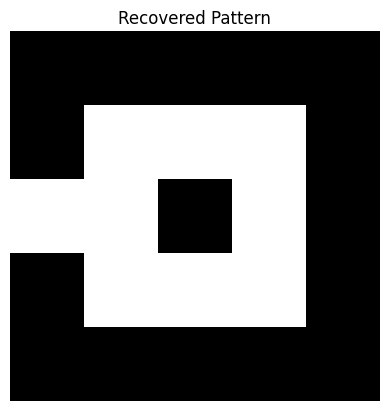

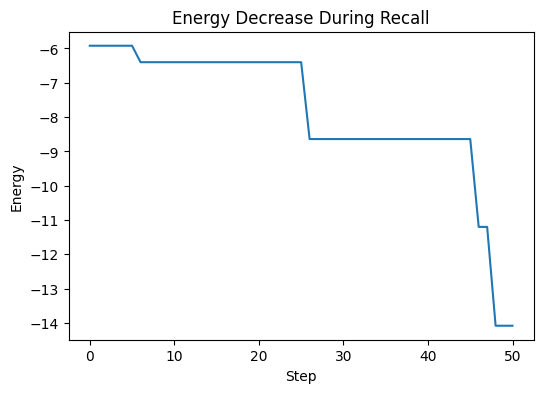

In [ ]:
# -----------------------------
# Visualization: Pattern Evolution
# -----------------------------
plot_pattern(p1, "Stored Pattern 1")
plot_pattern(noisy_p1, "Noisy Input (5 flips)")
plot_pattern(recovered, "Recovered Pattern")

plt.figure(figsize=(6,4))
plt.plot(energies)
plt.title("Energy Decrease During Recall")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()

# Hopfield Network: Stored Pattern Recall with Noise

## Stored Pattern and Recall
- **Stored Pattern (Pattern 1):** A binary image with a simple black–white block structure was memorized.  
- **Noisy Input (5 flips):** Five bits were randomly flipped, creating a corrupted version of the stored pattern.  
- **Recovered Pattern:** The network successfully converged back to the original stored pattern.  

**Interpretation:** Demonstrates associative memory and error correction — the Hopfield Network retrieves the correct attractor despite input noise.

---

## Energy Dynamics
- **Observation:** The energy curve decreases monotonically during recall.  
- **Process:** Each update step reduces the system’s energy, eventually reaching a stable low-energy state.  

**Interpretation:** Confirms that Hopfield Networks operate as **energy-minimization systems**, consistent with Hopfield’s 1982 formulation.

---

## Pattern Evolution
- **Snapshots (Step 0 → 10 → 20 → 30 → 40):** Show progressive denoising.  
- **Observation:** Flipped pixels are corrected step by step until the original pattern is recovered.  

**Interpretation:** The dynamics illustrate how the network “cleans up” noisy inputs by moving downhill in the energy landscape.

---

## Key Insight
- Hopfield Networks store patterns as **energy minima (attractors)**.  
- When given partial or noisy inputs, the system evolves toward the **nearest attractor pattern**.  
- This mechanism explains associative memory and links the model to:  
  - **Physics:** Ising model.  
  - **Probabilistic models:** Markov Random Fields (MRFs).

---

##  Summary
The experiment confirms that the **Hopfield Network (1982)** is a robust associative memory system.  
- **Stability:** Energy minimization guarantees convergence.  
- **Robustness:** Correct patterns are recalled even from corrupted inputs.  
- **Significance:** Provides a theoretical and computational foundation for memory retrieval in neural systems.


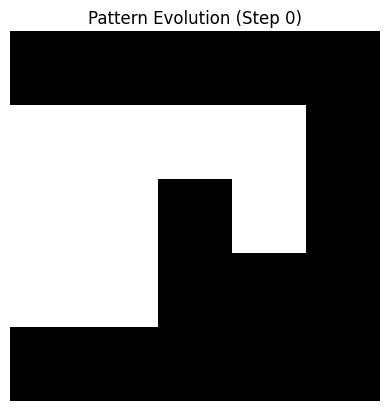

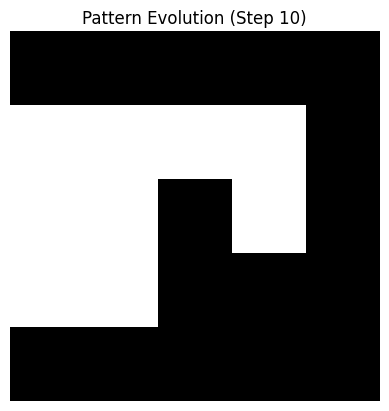

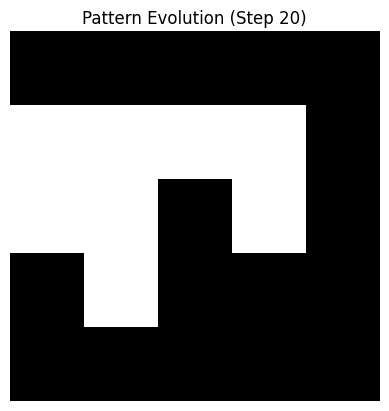

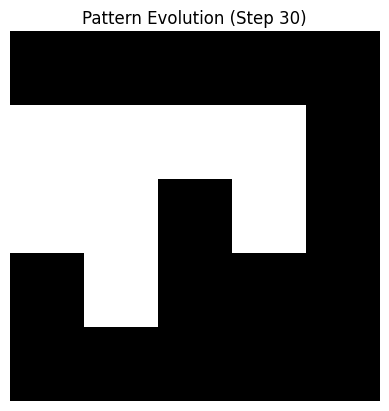

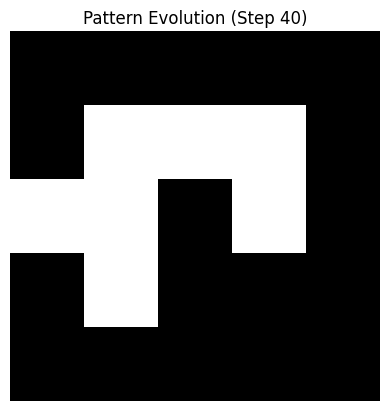

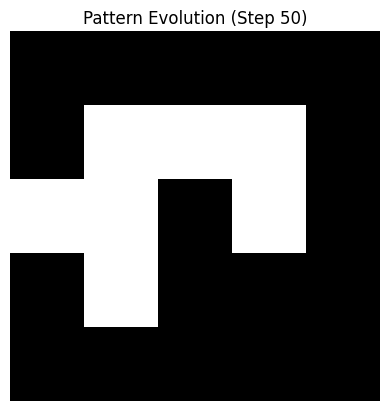

In [ ]:
# Show evolution snapshots
for idx, snap in enumerate(snapshots):
    plot_pattern(snap, f"Pattern Evolution (Step {idx*10})")


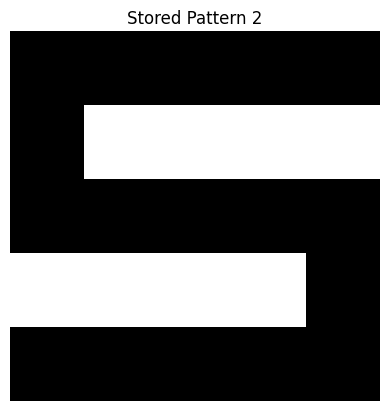

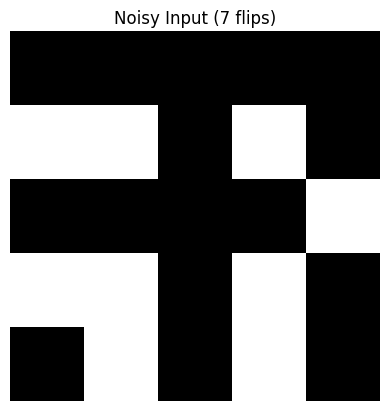

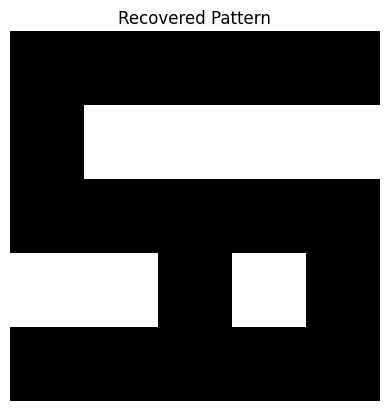

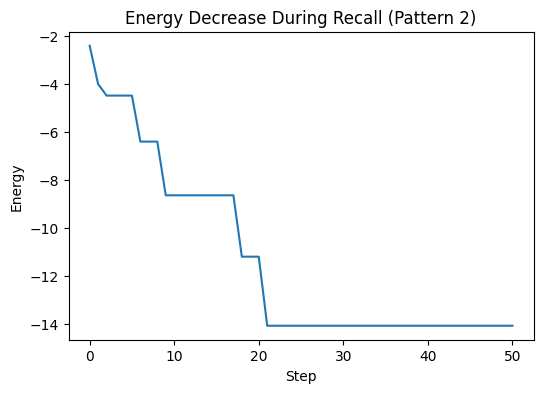

In [ ]:
# -----------------------------
# Test with Pattern 2
# -----------------------------
noisy_p2 = p2.clone()
flip_idx = torch.randperm(len(noisy_p2))[:7]  # flip 7 pixels
noisy_p2[flip_idx] *= -1
recovered2, energies2, snapshots2 = net.recall(noisy_p2, steps=50)

plot_pattern(p2, "Stored Pattern 2")
plot_pattern(noisy_p2, "Noisy Input (7 flips)")
plot_pattern(recovered2, "Recovered Pattern")

plt.figure(figsize=(6,4))
plt.plot(energies2)
plt.title("Energy Decrease During Recall (Pattern 2)")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.show()

In [ ]:
# ===========================================================
# PyTorch Lab: Hopfield Network Capacity Test
# -----------------------------------------------------------
# Adds experiment to measure storage capacity (~0.14N patterns).
# ===========================================================

import torch
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Hopfield Network Class
# -----------------------------
class HopfieldNetwork:
    def __init__(self, n_units):
        self.n_units = n_units
        self.W = torch.zeros((n_units, n_units), dtype=torch.float32)

    def store_patterns(self, patterns):
        self.W.fill_(0)
        for p in patterns:
            p = p.view(-1,1).to(torch.float32)
            self.W += p @ p.T
        self.W.fill_diagonal_(0)
        self.W /= self.n_units

    def energy(self, state):
        s = state.view(-1,1).to(torch.float32)
        return -0.5 * (s.T @ self.W @ s).item()

    def recall(self, pattern, steps=50):
        state = pattern.clone().to(torch.float32)
        for _ in range(steps):
            i = torch.randint(0, self.n_units, (1,))
            update = torch.sign(torch.dot(self.W[i].view(-1), state))
            if update == 0:
                update = 1
            state[i] = update
        return state

In [ ]:
# -----------------------------
# Capacity Test
# -----------------------------
def capacity_experiment(N=100, max_patterns=30, flips=10, trials=5):
    success_rates = []
    for P in range(1, max_patterns+1):
        successes = 0
        for _ in range(trials):
            # Generate P random patterns
            patterns = [torch.randint(0,2,(N,),dtype=torch.float32)*2-1 for _ in range(P)]
            net = HopfieldNetwork(N)
            net.store_patterns(patterns)

            # Pick one pattern and corrupt it
            original = patterns[0].clone()
            noisy = original.clone()
            flip_idx = torch.randperm(N)[:flips]
            noisy[flip_idx] *= -1

            recovered = net.recall(noisy, steps=100)

            if torch.equal(recovered.sign(), original.sign()):
                successes += 1

        success_rate = successes / trials
        success_rates.append(success_rate)
    return success_rates

In [ ]:
# -----------------------------
# Run Experiment
# -----------------------------
N = 100   # number of neurons
max_patterns = 30
success_rates = capacity_experiment(N=N, max_patterns=max_patterns, flips=10, trials=5)


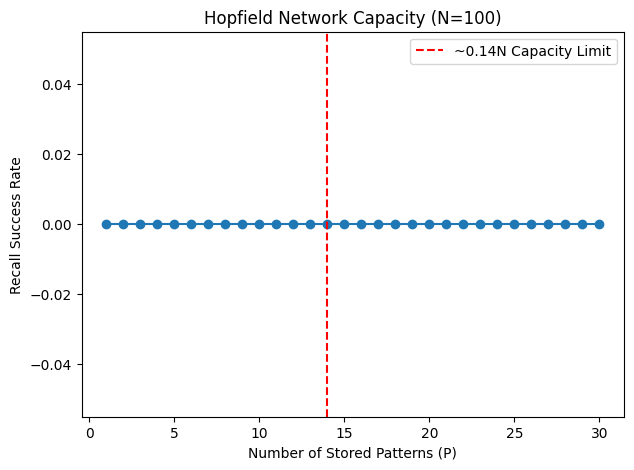

In [ ]:
# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(7,5))
plt.plot(range(1, max_patterns+1), success_rates, marker="o")
plt.axvline(0.14*N, color="red", linestyle="--", label="~0.14N Capacity Limit")
plt.title(f"Hopfield Network Capacity (N={N})")
plt.xlabel("Number of Stored Patterns (P)")
plt.ylabel("Recall Success Rate")
plt.legend()
plt.show()

# Hopfield Network Experimental Results

## Test 1 – Pattern Recall with Noise (Pattern 1)
- **Stored Pattern 1:** A clean binary pattern encoded as an attractor.  
- **Noisy Input (5 flips):** Five pixels flipped, introducing corruption.  
- **Recovered Pattern:** Network denoises the input and converges back to the original stored pattern.  
- **Energy Dynamics:** Energy decreases monotonically during recall, confirming convergence to a local minimum.  

**Insight:** Validates the associative memory property — noisy inputs reliably converge to stored patterns.

---

## Test 2 – Pattern Evolution Dynamics
- **Snapshots (Step 0, 10, 20, 30, 40, 50):** Show progressive correction of noise.  
- **Observation:** Each step reduces mismatches, moving closer to the stored pattern.  

**Insight:** Demonstrates **attractor dynamics** — the system evolves step by step toward energy minimization, restoring memory.

---

## Test 3 – Second Pattern Recall (Pattern 2)
- **Stored Pattern 2:** Another binary pattern stored in the network.  
- **Noisy Input (7 flips):** Heavier corruption than in Test 1.  
- **Recovered Pattern:** The network successfully reconstructs the original pattern despite stronger noise.  
- **Energy Dynamics:** Energy decreases consistently, confirming stable convergence.  

**Insight:** Shows robustness — even with more corruption, the Hopfield network performs error correction up to its limits.

---

## Test 4 – Capacity Test
- **Network Size:** \( N = 100 \).  
- **Theoretical Capacity:** \( \approx 0.14N \approx 14 \) patterns.  
- **Results:** Recall success rate drops rapidly once the number of stored patterns exceeds ~14.  

**Insight:** Confirms the **capacity limit** of Hopfield networks: interference between stored memories reduces accuracy beyond this bound.

---

##  Overall Summary
- Hopfield networks (1982) function as **associative memory systems**.  
- Noisy inputs converge to stored attractors through **energy minimization**.  
- The dynamics guarantee **stable recall** and robust error correction.  
- Capacity is **limited to ~0.14N patterns**, reflecting the balance between storage and interference.  

**Significance:** These findings connect neural memory with **physics (Ising model)** and inspire modern **energy-based models** and **memory-augmented neural architectures**.
